# Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another, can include multiple things as options.

## 1. Make classification data & get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, # Number of samples (1,000)
                    noise=0.03, # 'randomness' level
                    random_state=42) # Random seed

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X: \n{X[:5]}",
      f"\nFirst 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] 
First 5 samples of y: 
[1 1 1 1 0]


*2 classes of `X` for every 1 class of `y`*

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

*all `0`'s & `1`'s or in other words **Binary Classification***

In [5]:
# Make a DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], # Everything in the 1st (0) column of x
                        "X2": X[:, 1], # Everything in the 2nd (1) column of x
                        "label": y})

circles.head(10) # Show first 10 rows

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

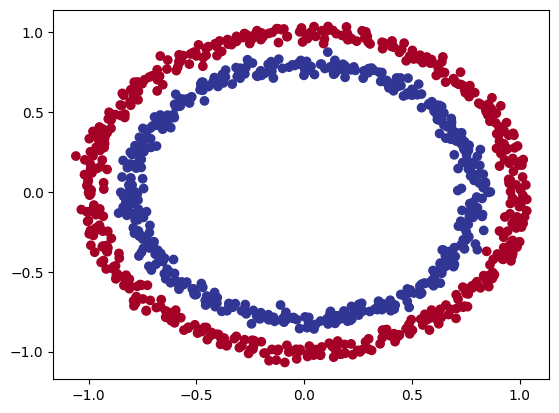

In [7]:
# Visualize the data to help understand
import matplotlib.pyplot as plt 

plt.scatter(x=circles["X1"], # Everything in the 1st (0) column of x for x axis
            y=circles["X2"], # Everything in the 2nd (1) column of x for y axis
            c=y, # Color by label (1 or 0)
            cmap=plt.cm.RdYlBu) # Color map

**Note**: The data we're working with is often called a "toy" dataset, a dataset small enought to experiment with, but still large enough to practice with.

### 1.1 Check input & output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# View the first example of features & lables
X_sample, y_sample = X[0], y[0]

print(f"Values for 1 sample of X: {X_sample}")
print(f"Values for 1 sample of y: {y_sample}")

print(f"Shape for 1 sample of X: {X_sample.shape}")
print(f"Shape for 1 sample of y: {y_sample.shape}")

Values for 1 sample of X: [0.75424625 0.23148074]
Values for 1 sample of y: 1
Shape for 1 sample of X: (2,)
Shape for 1 sample of y: ()


*`y` is a scalar so `0` dimension/shape*

### 1.2 Turn data into tensors & create train & test splits

In [11]:
type(X)

numpy.ndarray

In [12]:
# Turn data into tensors
import torch

X = torch.from_numpy(X).type(torch.float) # Convert X from numpy float 64 to tensor float 32
y = torch.from_numpy(y).type(torch.float) # Convert y from numpy float 64 to tensor float 32



In [13]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
# Split data into training & test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # Split data into 80% training & 20% testing
                                                    random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model able to classify the blue & red dots.

To-do:
1. Write device agnostic code.
2. Construct model with `nn.Module`.
3. Define loss function & optimizer
4. Create training & test loop.

In [41]:
import torch
from torch import nn

# Create device agnostic code
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(f"Device: {device}")

Device: cuda


In [17]:
X_train.shape

torch.Size([800, 2])

In [18]:
y_train.shape

torch.Size([800])

*Construct model with `nn.Module`.*
1. Subclass `nn.Module` as almost all models in PyTorch use it.
2. Create 2 `nn.Linear()` layers capable of handling the shapes of the data.
3. Define a `forward()` method that outlines the forward pass (or forward computation) of the model.
4. Instantiate an instance of the model class & send to target `device`.

In [19]:
# 1. Construct model with nn.Module.
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # 2. Create 2 nn.Linear layers to handle the shapes of the data.
        self.layer_1 = nn.Linear(in_features=2, # Input feature size. 2 for circle as X is a vector of 2 values
                                 out_features=5) # Takes in 2 features & outputs 5
        
        self.layer_2 = nn.Linear(in_features=5, # Takes in 5 features to match layer_1 output
                                 out_features=1) # Output a single feature. 1 for y, as it's a scalar of 1 value
        
        # 3. forward method to perform the forward pass
        def forward(self, x):
            return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of the model class & send it to target device.
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
# We can replicate the above model using `nn.Sequential()`
model_0 = nn.Sequential(
    nn.Linear(in_features=2, # Input feature size. 2 for circle as X is a vector of 2 values
              out_features=128), # Takes in 2 features & outputs 128

    nn.Linear(in_features=128, # Takes in 128 features to match layer_1 output
              out_features=256), # outputs 256 features

    nn.Linear(in_features=256,
              out_features=512),

    nn.Linear(in_features=512,
              out_features=1), # Output a single feature. 1 for y, as it's a scalar of 1 value
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=512, bias=True)
  (3): Linear(in_features=512, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3173, -0.0023],
                      [-0.1163,  0.0561],
                      [-0.6940,  0.1640],
                      [-0.0190, -0.0451],
                      [ 0.5157,  0.5952],
                      [ 0.2759, -0.0359],
                      [-0.2742, -0.3455],
                      [-0.1285, -0.6220],
                      [-0.0867, -0.3071],
                      [-0.6179, -0.2584],
                      [ 0.0040,  0.3030],
                      [-0.1773,  0.2111],
                      [ 0.1203, -0.5502],
                      [ 0.5272,  0.2189],
                      [-0.1785, -0.5208],
                      [-0.1201, -0.2186],
                      [ 0.1571,  0.4192],
                      [ 0.4194,  0.0798],
                      [ 0.2399,  0.6017],
                      [ 0.6200, -0.0487],
                      [-0.6929, -0.5446],
                      [-0.0531, -0.6473],
                      [-0.4133,  0.3057],
        

In [23]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"First 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])
First 10 predictions: tensor([[-0.0757],
        [-0.0130],
        [-0.1863],
        [-0.0446],
        [-0.1008],
        [-0.0632],
        [ 0.0457],
        [ 0.0342],
        [-0.1897],
        [-0.0078]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [24]:
X[:10], y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

### 2.1 Setup loss function & optimizer

Which loss function or optimizer should we use?

Again... this is problem specific.

For example, for regression (predicting a number) you might want MAE (Mean Absolute Error) or MSE (Mean Squared Error).

For classification you might want Binary Cross Entropy or Categorical Cross Entropy (Cross Entropy).

As a reminder, the loss function measures how *wrong* your models predictions are.

For optimizers, two of the most common & useful are SGD (Stochastic Gradient Descent) & Adam, however PyTorch has many more built-in options.

In [25]:
# Setup the loss function
#loss_fn = nn.BCELoss() # BCELoss = Requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # Binary Cross Entropy w/ Logits Loss = Sigmoid activation built-in, more numericaly stable than BCELoss + Sigmoid activation

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3173, -0.0023],
                      [-0.1163,  0.0561],
                      [-0.6940,  0.1640],
                      [-0.0190, -0.0451],
                      [ 0.5157,  0.5952],
                      [ 0.2759, -0.0359],
                      [-0.2742, -0.3455],
                      [-0.1285, -0.6220],
                      [-0.0867, -0.3071],
                      [-0.6179, -0.2584],
                      [ 0.0040,  0.3030],
                      [-0.1773,  0.2111],
                      [ 0.1203, -0.5502],
                      [ 0.5272,  0.2189],
                      [-0.1785, -0.5208],
                      [-0.1201, -0.2186],
                      [ 0.1571,  0.4192],
                      [ 0.4194,  0.0798],
                      [ 0.2399,  0.6017],
                      [ 0.6200, -0.0487],
                      [-0.6929, -0.5446],
                      [-0.0531, -0.6473],
                      [-0.4133,  0.3057],
        

In [27]:
# Calculate accuracy - out of 100 examples, what % does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # Returns the number of elements in y_true that are equal to y_pred as a pythion integer
    acc = (correct / len(y_pred))*100
    return acc

## 3. Train Model

To train our model, first we build the training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backwards (back propogation)
5. Optimizer zero step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. Sigmoid for Binary Cross Entropy & Softmax for Multiclass Cassification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.


In [28]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0757],
        [-0.0130],
        [-0.1863],
        [-0.0446],
        [-0.1008]], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4811],
        [0.4968],
        [0.4536],
        [0.4889],
        [0.4748]], device='cuda:0')

**NOTE:** For our prediction probability values, we need to preform a range-style rounding on them.

* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [31]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
model_0.eval()
with torch.inference_mode():
    y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training & test loop

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training & evalutaion loop
for epoch in range(epochs):
    ###Training
    model_0.train()

    # 1. Do the forward pass
    y_logits = model_0(X_train).squeeze() # Model outputs pure logits, .squeeze() gets rid of the extra unnecessary dimension
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate the loss (& accuracy)
    #loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
    #               y_train)

    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backward (Backpropagation)
    loss.backward()

    # 5. Optimizer step, step, step (gradient descent)
    optimizer.step()

    ###Testing
    model_0.eval
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, 
                            y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print whats happening
    if epoch % 100 == 0: # Print every 10 epochs
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

## 4. Make predictions & evaluate the model

From the metrics it looks like our model is not learning anything...

So to inspect it let's make some predictions & make them visual! (visualize, visualize, visualize)

To do so, we will import a function called `plot

In [33]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists.")
else:
    print("Downloaded helper_functions.py")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py") # Use requests.get() to download the raw file data from GitHub
    with open("helper_functions.py", "wb") as f: # Use open() to open the file in write-binary mode as variable f
        f.write(requests.content) # Write the downloaded data to the file

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists.


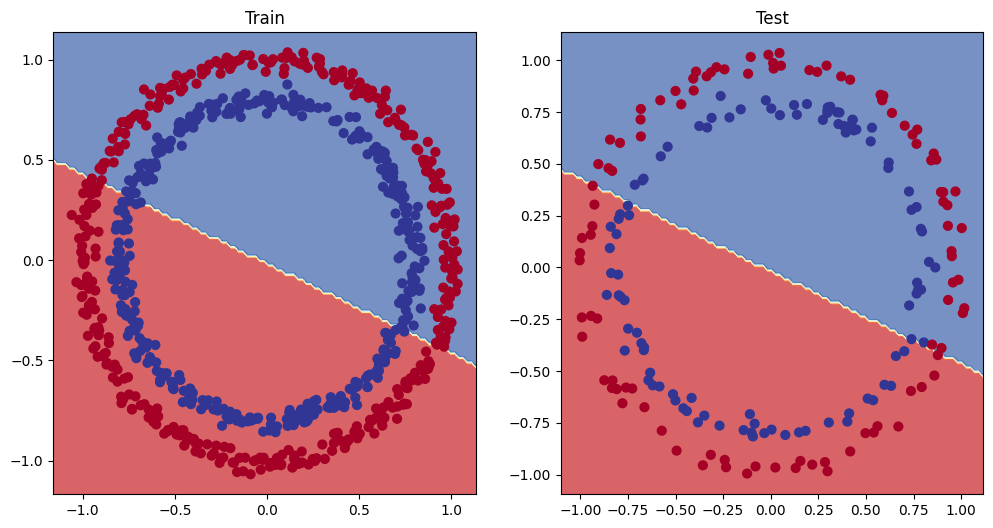

In [34]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6)) # figure(figsize=(width & height in inches))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.title("Train") # Plot title
plot_decision_boundary(model_0, X_train, y_train) # Makes predictions on the input data
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

How can you go about improving your model?
* Add more layers - gives the model more chances to lean about patterns in the data.
* Add more hidden units - go from 5 hidden units to 10 hidden units.

These may not work if your data set is simple (like ours), so what else can we do?
* Run more epochs to give the model a longer time to look at the data.
* Changing the activation function (we are using sigmoid) or put an activation functon in the model (?).
* Change the learning Rate
* Change the loss function (in our case Binary Cross Entropy With Loss)

These options are all from the model's perspective as they deal directly with the model rather than the data.

Because these options are all values we can change, they are reffered to as **hyperparameters**.
* **Parameters** are changed by the model, **hyperparameters** are changed by the user.

Let's start improvments by:
* Adding more hidden units: 5 -> 10
* Increase the numbers of layers 2 -> 3
* Increase the number of epochs 100 -> 1000

In [35]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [36]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=10)
        
        self.layer_2 = nn.Linear(in_features=10,
                                 out_features=10)
        
        self.layer_3 = nn.Linear(in_features=10,
                                 out_features=1)
        
    def forward(self, x):
        #z = self.layer_1(x) # x -> layer_1 -> z -> layer_2 -> z -> layer_3 -> z -> output
        #z = self.layer_2(z) # z = logits
        #z = self.layer_3(z)
        #return z

        return self.layer_3(self.layer_2(self.layer_1(x))) # This was is most efficient
    
model_1 = CircleModelV1().to(device)
model_1
        

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [44]:
# Write a trainig & evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 1024

# Device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards (back propogation)
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():

        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss
        test_loss = loss_fn(test_logits,
                            y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
        # Print whats happening
        if epoch % 64 == 0: # Print every 10 epochs
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 64 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 128 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 192 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 256 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 320 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 384 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 448 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 512 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 576 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 640 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 704 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 768 | Loss: 0.69396 | Ac

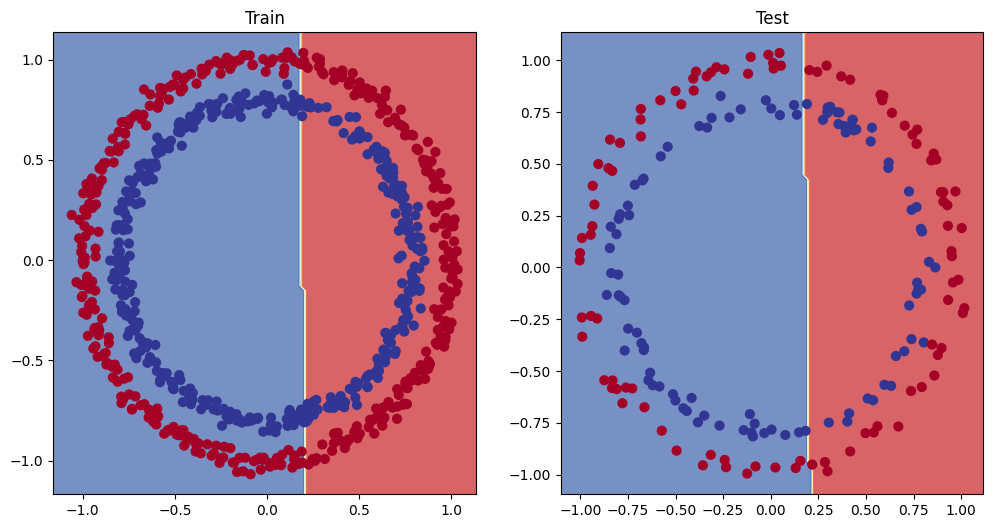

In [45]:
# Plot the decision boundary
plt.figure(figsize=(12, 6)) # figure(figsize=(width & height in inches))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.title("Train") # Plot title
plot_decision_boundary(model_1, X_train, y_train) # Makes predictions on the input data
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [62]:
# Create some basic data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1) # Have to add a dimension or else errors
y_regression = bias + weight * X_regression # y = bias + weight * X (linear regression formula)

# Check data
print(len(X_regression))

X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [63]:
# Create train & test split
train_split = int(len(X_regression) * 0.8)
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check lengths
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

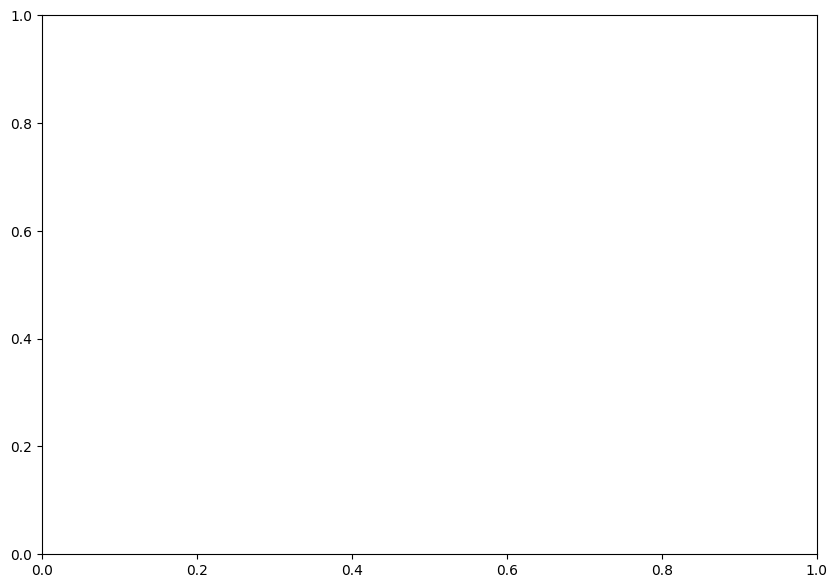

In [72]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [65]:
CircleModelV1()

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

**NOTE:** CircleModelV1 takes in 2 features in layer_1 (2 X-values) where as in our simple linear data, there is only 1 X-value

In [66]:
# Same architecture as before
model_2 = nn.Sequential(
    nn.Linear(in_features=1, # Input feature size. 1 for circle as X is a vector of 1 value
              out_features=10), # Takes in 1 features & outputs 10

    nn.Linear(in_features=10, # Takes in 10 features to match layer_1 output
              out_features=10), # outputs 10 features

    nn.Linear(in_features=10,
              out_features=1), # Output a single feature. 1 for y, as it's a scalar of 1 value
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [70]:
# Loss & Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [71]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# number of epochs/iterations
epochs = 1024

# Put data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

### Training loop
for epoch in range(epochs):
    model_2.train() # Sets all parameters that require gradients to true (used for training mode)

    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer Zero grad
    optimizer.zero_grad()

    # 4. Loss backwards (backpropogation)
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing loop
    model_2.eval() # Sets all parameters that require gradients to false (used for evaluation mode)
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_2(X_test_regression)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test_regression)

    # Print whats happening
    if epoch % 64 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")
    

Epoch: 0 | Loss: 0.04757 | Test Loss: 0.03346
Epoch: 64 | Loss: 0.00280 | Test Loss: 0.00778
Epoch: 128 | Loss: 0.00476 | Test Loss: 0.00284
Epoch: 192 | Loss: 0.00637 | Test Loss: 0.00119
Epoch: 256 | Loss: 0.00667 | Test Loss: 0.00170
Epoch: 320 | Loss: 0.00664 | Test Loss: 0.00138
Epoch: 384 | Loss: 0.00662 | Test Loss: 0.00109
Epoch: 448 | Loss: 0.00629 | Test Loss: 0.00100
Epoch: 512 | Loss: 0.00659 | Test Loss: 0.00144
Epoch: 576 | Loss: 0.00656 | Test Loss: 0.00113
Epoch: 640 | Loss: 0.00686 | Test Loss: 0.00162
Epoch: 704 | Loss: 0.00653 | Test Loss: 0.00146
Epoch: 768 | Loss: 0.00651 | Test Loss: 0.00115
Epoch: 832 | Loss: 0.00681 | Test Loss: 0.00163
Epoch: 896 | Loss: 0.00648 | Test Loss: 0.00128
Epoch: 960 | Loss: 0.00646 | Test Loss: 0.00114


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

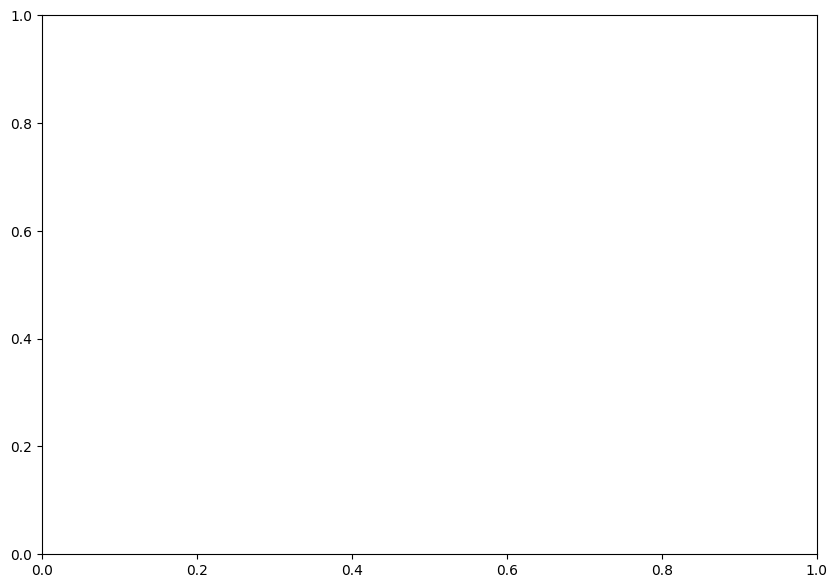

In [ ]:
# Turn on evaluation mode
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot predictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)